# Programación como herramienta para la ingeniería - 2019-2
## Profesor: Francisco Garrido (fgv@ing.puc.cl)
#### Ayudantes:
* José luis Casanova (jlcasanova@uc.cl)
* Cristobal Franke (cmfrancke@uc.cl)
* Felipe Gómez (fagomez2@uc.cl)
* Andrés Jahr (asjahr@uc.cl)
* Pablo Seisdedos(pcseisdedos@uc.cl)

## Laboratorio 2: Estructuras de datos

### Temas a abordar:
* Encuesta medio semestre
* Notas P01
* L02 (descargar)
* Formato 
* Eficiencia
* Modelación pregunta 5
* Graficar

### Lectura de archivos

Leemos los datos desde la base de datos

In [1]:
def leer_datos(path):
    with open(path,"r") as archivo:
        matriz = [ i.strip("\n") for i in archivo.readlines()]
        return matriz

### Modelar redes con POO

Definimos la clase nodo para almacenar la información

In [2]:
class Nodo:
    _id = 0
    def __init__(self, posicion):
        self._id = Nodo._id 
        self.posicion = posicion # Tupla (x,y)
        self.vecinos = []
        Nodo._id += 1
        
    def add_vecino(self, nodo):
        self.vecinos.append(nodo)
        
    def __str__(self):
        return "Nodo: " + str(self.posicion) + " Vecinos: " + str([nodo.posicion for nodo in self.vecinos])

Almacenamos el grafo en una estructura de datos con las características que necesitemos

In [3]:
def crear_grafo(matriz):
    grafo = dict()
    fila = len(matriz)
    columna = len(matriz[0])
    
    for i in range(fila):
        for j in range(columna):
            if matriz[i][j] == "O":
                if (i,j) not in grafo.keys():
                    nodo = Nodo((i,j))
                    grafo.update({(i,j):nodo}) # grafo[(i,j)] = nodo
                
                for f,c in [(-1,0),(0,-1),(1, 0), (0, 1)]: #Accede arriba, izquierda, abajo, derecha
                    if i + f >= 0 and j + c >= 0 and i + f < fila and j + c < columna: # si no estoy en un borde
                        if matriz[i+f][j+c] == "O":
                            if (i+f,j+c) not in grafo.keys():
                                vecino = Nodo((i+f,j+c))
                                grafo.update({(i+f,j+c):vecino}) # grafo[(i+f,j+c)] = vecino
                            else:
                                vecino = grafo[(i+f,j+c)]
                            grafo[(i,j)].add_vecino(vecino)
    return grafo

Probamos el código

In [4]:
matriz = leer_datos("test.txt")
grafo = crear_grafo(matriz)

In [5]:
for nodo in grafo.values():
    print(nodo)

Nodo: (0, 0) Vecinos: [(1, 0), (0, 1)]
Nodo: (1, 0) Vecinos: [(0, 0), (2, 0), (1, 1)]
Nodo: (0, 1) Vecinos: [(0, 0), (1, 1), (0, 2)]
Nodo: (1, 1) Vecinos: [(0, 1), (1, 0), (2, 1), (1, 2)]
Nodo: (0, 2) Vecinos: [(0, 1), (1, 2), (0, 3)]
Nodo: (1, 2) Vecinos: [(0, 2), (1, 1), (2, 2)]
Nodo: (0, 3) Vecinos: [(0, 2), (0, 4)]
Nodo: (0, 4) Vecinos: [(0, 3), (1, 4), (0, 5)]
Nodo: (1, 4) Vecinos: [(0, 4), (2, 4), (1, 5)]
Nodo: (0, 5) Vecinos: [(0, 4), (1, 5)]
Nodo: (1, 5) Vecinos: [(0, 5), (1, 4), (2, 5)]
Nodo: (2, 0) Vecinos: [(1, 0), (3, 0), (2, 1)]
Nodo: (2, 1) Vecinos: [(1, 1), (2, 0), (2, 2)]
Nodo: (2, 2) Vecinos: [(1, 2), (2, 1)]
Nodo: (2, 4) Vecinos: [(1, 4), (2, 5)]
Nodo: (2, 5) Vecinos: [(1, 5), (2, 4), (3, 5)]
Nodo: (3, 0) Vecinos: [(2, 0), (4, 0)]
Nodo: (3, 5) Vecinos: [(2, 5), (4, 5)]
Nodo: (4, 0) Vecinos: [(3, 0), (5, 0)]
Nodo: (4, 5) Vecinos: [(3, 5), (4, 4), (5, 5)]
Nodo: (5, 0) Vecinos: [(4, 0), (5, 1)]
Nodo: (4, 2) Vecinos: [(5, 2), (4, 3)]
Nodo: (5, 2) Vecinos: [(4, 2), (5, 1),

### Graficar

La gran mayoría de los ejemplos de más abajo fueron basados en la documentación de la librería NetworkX. Para mayor información no duden en visitar [NetworkX Drawing Documentation](https://networkx.github.io/documentation/stable/reference/drawing.html).

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def graficar(grafo, tamaño_fuente, tamaño_nodo):
    G = nx.DiGraph()
    posiciones = dict()
    arcos = set()
    
    for nodo in grafo.values():
        G.add_node(nodo._id,pos = nodo.posicion)
        posiciones[nodo._id] = nodo.posicion
        for vecino in nodo.vecinos:
            if (nodo._id, vecino._id) not in arcos and (vecino._id, nodo._id) not in arcos:
                G.add_edge(nodo._id, vecino._id) #cola, cabeza
    nx.draw(G, pos=posiciones, with_labels=True, font_size=tamaño_fuente, node_size=tamaño_nodo, node_color="lightblue")
    plt.show()

c:\users\pcseisdedos\my_python\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\users\pcseisdedos\my_python\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


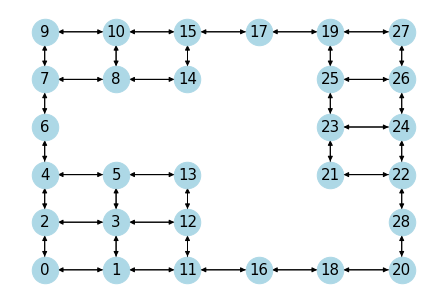

In [7]:
graficar(grafo,15,700)

## Graficar el árbol

ESTO ES UNA VERSION SIMPLIFICADA, NO ES LO QUE SE ESPERA QUE HAGAN.

In [8]:
def graficar_arbol():
    G = nx.DiGraph()
    posiciones = {"Francisco": (3,7),"Felipe": (3,3),"Pablo": (1,1),"Cristobal":(5,1)}
    nodos = {"Francisco": ("Felipe",),"Felipe": ("Pablo","Cristobal")}
    
    for nodo in nodos.keys():
        G.add_node(nodo,pos = posiciones[nodo]) #pos = nodo.posicion
        for vecino in nodos[nodo]:
            G.add_edge(nodo, vecino) #cola, cabeza
    nx.draw(G,pos = posiciones, with_labels=True, font_size=11, node_size=2500,node_color = "lightblue")
    plt.show()

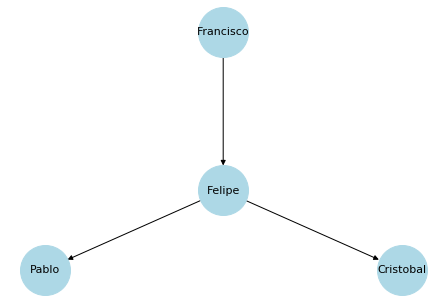

In [9]:
graficar_arbol()

In [10]:
def graficar_arbol():
    G = nx.DiGraph()
    posiciones = {"Francisco": (3,7),"Felipe": (3,3),"Pablo": (1,1),"Cristobal":(5,1)}
    nodos = {"Francisco": ("Felipe",),"Felipe": ("Pablo","Cristobal")}
    enfermo, sano = "r", "b"
    colores = {"Francisco": sano,"Felipe": enfermo,"Pablo": enfermo, "Cristobal":sano}
    enfermos = ["Felipe", "Pablo"]
    sanos = ["Francisco", "Cristobal"]
    
    for nodo in nodos.keys():
        G.add_node(nodo,pos = posiciones[nodo], node_color = colores[nodo]) #pos = nodo.posicion
        for vecino in nodos[nodo]:
            G.add_edge(nodo, vecino) #cola, cabeza
            
    nx.draw_networkx_nodes(G, posiciones, nodelist = enfermos, node_color = enfermo, node_size=2500, alpha=0.8) #rojo
    nx.draw_networkx_nodes(G, posiciones, nodelist=sanos, node_color= sano, node_size=2500, alpha=0.8) #azul
    nx.draw_networkx_edges(G, posiciones, width=1.0, alpha=0.5)
    #nx.draw(G,pos = posiciones, with_labels=True, font_size=11, node_size=2500)
    labels = {}
    labels["Francisco"] = "Francisco"#cursivas
    labels["Felipe"] = "Felipe"
    labels["Pablo"] = "Pablo"
    labels["Cristobal"] = "Cristobal"
    nx.draw_networkx_labels(G, posiciones, labels, font_size=11)
    plt.axis('off')
    plt.show()

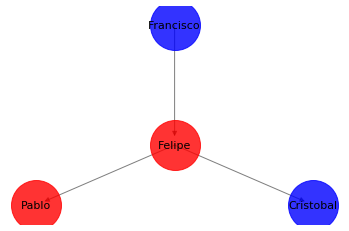

In [11]:
graficar_arbol()

Se espera una representación como la anterior en donde se identifiquen los niveles, las relaciones y los contagiados en formato png o pdf.